# Content

### 1. Data Exploration
#####     1.1 Categorical Features Exploration
#####     1.2 Numeric Features Exploration
#####     1.3 Data Exploration Conclusion: VERY IDEAL DATA
### 2. Data Preprocessing
#####     2.1 consistant naming
#####     2.2 Handle missing values
#####     2.3 Feature Engineering
### 3. Final dataset for modeling
### 4. Modeling
### 5. Compare different models' accuracy score & best score

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('train_test_data.xlsx')

In [3]:
df_test=pd.read_excel('valid_data.xlsx')

In [4]:
print(df.shape)
print(df_test.shape)

(32500, 16)
(13500, 15)


In [5]:
df.head()

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,1001,1981-10-09 00:00:00,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,1002,1970-09-05 00:00:00,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,1003,1982-08-18 00:00:00,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,1004,1967-12-27 00:00:00,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,1005,1992-01-25 00:00:00,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [6]:
df['income_class'].value_counts()

 <=50K    24675
 >50K      7825
Name: income_class, dtype: int64

In [7]:
class_dict={' <=50K':0,' >50K':1}
df['class']=df['income_class'].map(class_dict)
df.head()

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,class
0,1001,1981-10-09 00:00:00,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,0
1,1002,1970-09-05 00:00:00,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,0
2,1003,1982-08-18 00:00:00,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,0
3,1004,1967-12-27 00:00:00,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,0
4,1005,1992-01-25 00:00:00,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,0


In [8]:
df['class'].value_counts()/df.shape[0]

0    0.759231
1    0.240769
Name: class, dtype: float64

## Note: imbalanced dataset

# 1. Data Exploration

## 1.1 Categorical Features Exploration

# workclass

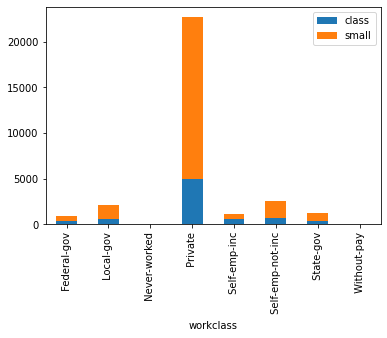

In [9]:
df['small']= 1 - df['class']
df.groupby('workclass').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

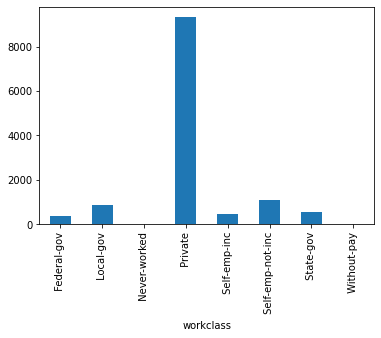

In [10]:
df_test.groupby('workclass').count().race.plot(kind='bar')

# education

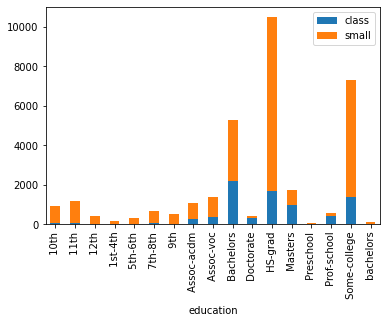

In [11]:
df.groupby('education').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

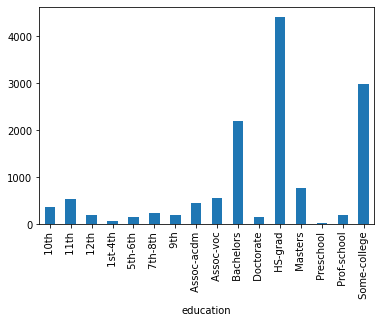

In [12]:
df_test.groupby('education').count().race.plot(kind='bar')

Note: bachelors need to be changed to Bachelors

# martial_status

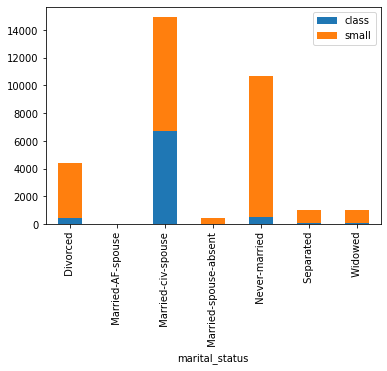

In [13]:
df.groupby('marital_status').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

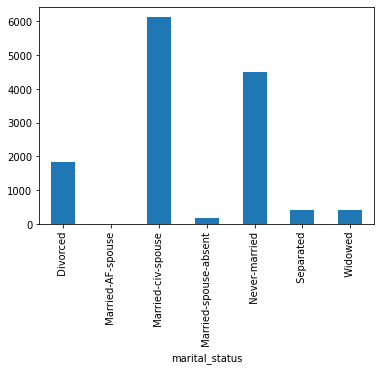

In [14]:
df_test.groupby('marital_status').count().race.plot(kind='bar')

# occupation

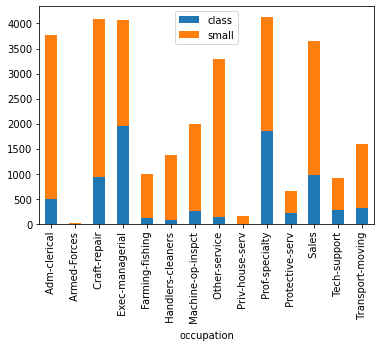

In [15]:
df.groupby('occupation').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

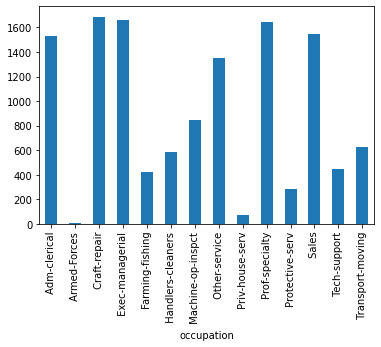

In [16]:
df_test.groupby('occupation').count().race.plot(kind='bar')

# relationship

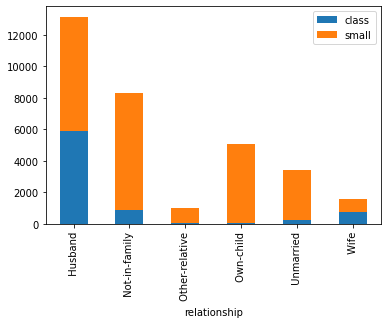

In [17]:
df.groupby('relationship').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

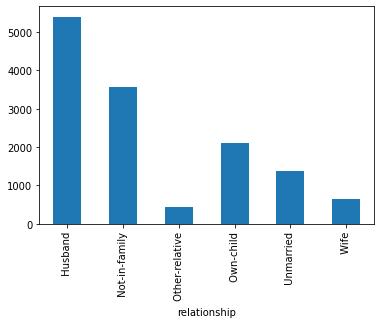

In [18]:
df_test.groupby('relationship').count().race.plot(kind='bar')

# race

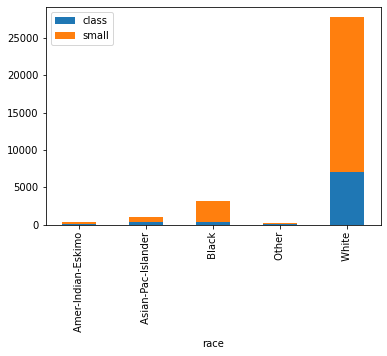

In [19]:
df.groupby('race').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

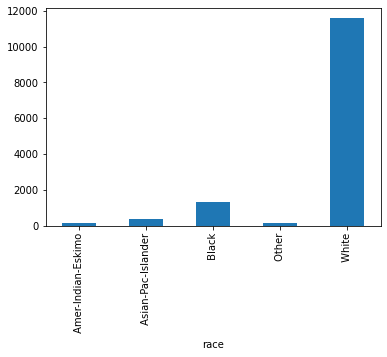

In [20]:
df_test.groupby('race').count().sex.plot(kind='bar')

# sex

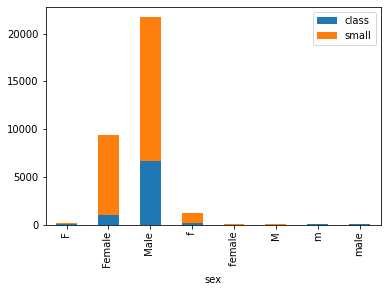

In [21]:
df.groupby('sex').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

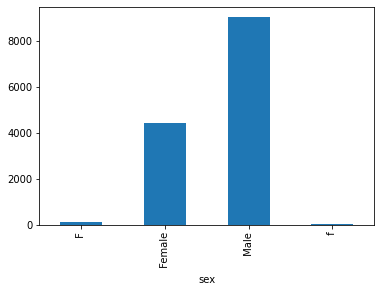

In [22]:
df_test.groupby('sex').count().race.plot(kind='bar')

note: need to rename

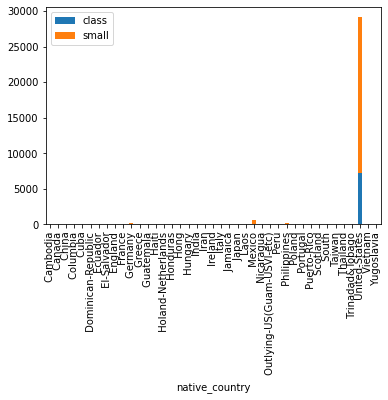

In [23]:
df.groupby('native_country').agg('sum')[['class','small']].plot(kind='bar',stacked=True)

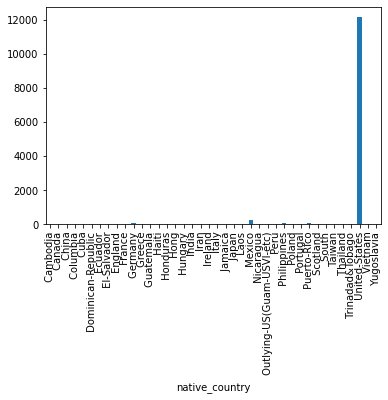

In [24]:
df_test.groupby('native_country').count().race.plot(kind='bar')

# 1.2 Numeric Features Exploration

In [25]:
df.head()

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,class,small
0,1001,1981-10-09 00:00:00,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,0,1
1,1002,1970-09-05 00:00:00,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,0,1
2,1003,1982-08-18 00:00:00,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,0,1
3,1004,1967-12-27 00:00:00,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,0,1
4,1005,1992-01-25 00:00:00,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,0,1


# fnlwgt

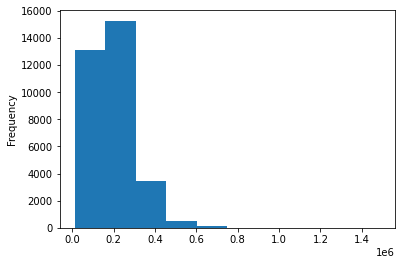

In [26]:
df['fnlwgt'].plot(kind='hist')

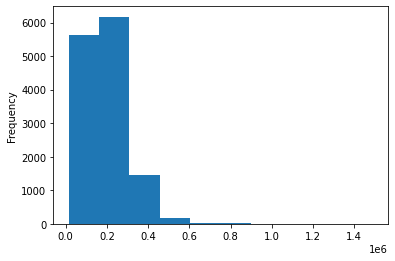

In [27]:
df_test['fnlwgt'].plot(kind='hist')

# education_num

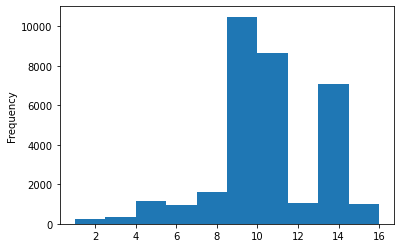

In [28]:
df['education_num'].plot(kind='hist')

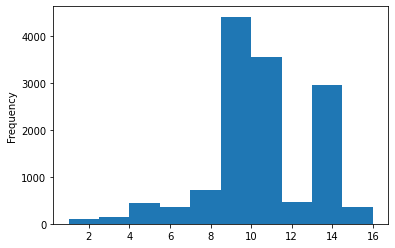

In [29]:
df_test['education_num'].plot(kind='hist')

# capital_gain

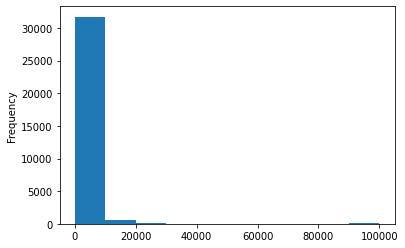

In [30]:
df['capital_gain'].plot(kind='hist')

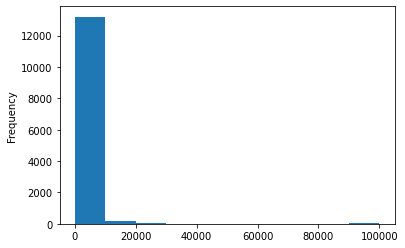

In [31]:
df_test['capital_gain'].plot(kind='hist')

# capital_loss

(-200.0, 5000.0)

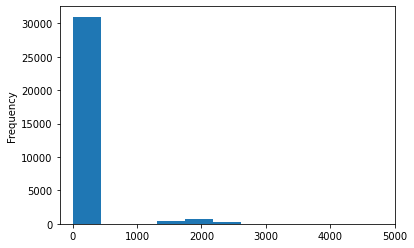

In [32]:
df['capital_loss'].plot(kind='hist')
plt.xlim([-200, 5000])

(-200.0, 5000.0)

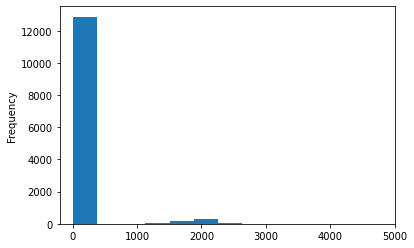

In [33]:
df_test['capital_loss'].plot(kind='hist')
plt.xlim([-200, 5000])

# hours_per_week

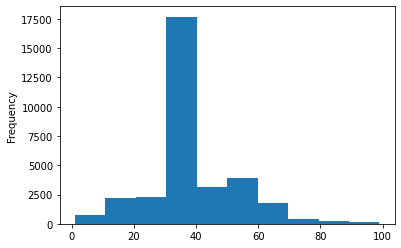

In [34]:
df['hours_per_week'].plot(kind='hist')

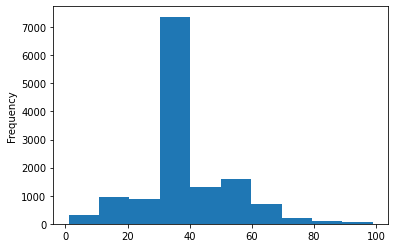

In [35]:
df_test['hours_per_week'].plot(kind='hist')

## 1.3 Data Exploration Conclusion: 
## Same distribution between train and test datasets for each feature! 
## VERY IDEAL DATA!!!

# 2. Data Preprocessing

## 2.1 consistant naming

In [36]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th', ' bachelors'], dtype=object)

In [37]:
df["education"].replace({' bachelors':' Bachelors'}, inplace=True)

In [38]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [39]:
df['sex'].unique()

array([' Male', ' Female', ' F', 'M', 'male', 'm', ' f', ' female'],
      dtype=object)

In [40]:
df_test['sex'].unique()

array([' Female', ' Male', ' f', ' F'], dtype=object)

In [41]:
sex_dict={' F':'Female',' Female':'Female',' Male':'Male',' f':'Female',' female':'Female', 'M':'Male','m':'Male','male':'Male'}
df['sex']=df['sex'].map(sex_dict)
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
df_test['sex']=df_test['sex'].map(sex_dict)
df_test['sex'].unique()

array(['Female', 'Male'], dtype=object)

# 2.2 Handle missing values

In [43]:
df.isnull().sum()/df.shape[0]*100

cit_index         0.000000
birth_date        0.000000
workclass         5.630769
fnlwgt            0.070769
education         0.000000
education_num     0.123077
marital_status    0.000000
occupation        5.652308
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.076923
native_country    1.787692
income_class      0.000000
class             0.000000
small             0.000000
dtype: float64

In [44]:
df_test.isnull().sum()/df_test.shape[0]*100

cit_index         0.000000
birth_date        0.000000
workclass         5.896296
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.918519
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.688889
dtype: float64

In [45]:
df.describe(include='all')

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,class,small
count,32500.000000,32500,30670,3.247700e+04,32500,32460.000000,32500,30663,32500,32500,32500,32500.000000,32500.000000,32475.000000,31919,32500,32500.000000,32500.000000
unique,NaN,15147,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2,NaN,NaN
top,NaN,1989-03-02 00:00:00,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,NaN,NaN
freq,NaN,12,22652,NaN,10482,NaN,14946,4132,13169,27769,21757,NaN,NaN,NaN,29115,24675,NaN,NaN
mean,17250.500000,NaN,NaN,1.897837e+05,NaN,10.080376,NaN,NaN,NaN,NaN,NaN,1075.529969,87.440615,40.437229,NaN,NaN,0.240769,0.759231
std,9382.086211,NaN,NaN,1.055972e+05,NaN,2.574006,NaN,NaN,NaN,NaN,NaN,7370.866087,403.296778,12.348144,NaN,NaN,0.427557,0.427557
min,1001.000000,NaN,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000
25%,9125.750000,NaN,NaN,1.177890e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000,1.000000
50%,17250.500000,NaN,NaN,1.783530e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000,1.000000
75%,25375.250000,NaN,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,0.000000,1.000000


In [46]:
df["education_num"] = pd.to_numeric(df["education_num"], downcast="float")

In [47]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
df['native_country']=df['native_country'].fillna(df['native_country'].mode()[0])
df['fnlwgt']=df['fnlwgt'].fillna(df['fnlwgt'].median())
df['education_num']=df['education_num'].fillna(df['education_num'].median())
df['hours_per_week']=df['hours_per_week'].fillna(40)

In [48]:
df.isnull().sum()

cit_index         0
birth_date        0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_class      0
class             0
small             0
dtype: int64

In [49]:
df_test['workclass']=df_test['workclass'].fillna(' Private')
df_test['workclass'].unique()

array([' Private', ' Local-gov', ' Federal-gov', 'Private',
       ' Self-emp-not-inc', ' Self-emp-inc', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [50]:
df_test['occupation']=df_test['occupation'].fillna(' Pro-specialty')
df_test['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Prof-specialty',
       ' Protective-serv', 'Pro-specialty', ' Exec-managerial',
       ' Craft-repair', ' Farming-fishing', ' Adm-clerical', ' Sales',
       ' Transport-moving', ' Tech-support', ' Handlers-cleaners',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [51]:
df_test['native_country']=df_test['native_country'].fillna(' United_States')
df_test['native_country'].unique()

array([' United-States', ' South', ' Canada', ' El-Salvador', ' Mexico',
       ' Taiwan', ' Philippines', ' England', ' Columbia', ' Scotland',
       ' India', ' China', ' Thailand', ' Poland', 'United_States',
       ' Jamaica', ' Portugal', ' Japan', ' Puerto-Rico', ' Germany',
       ' Haiti', ' Dominican-Republic', ' Guatemala', ' Trinadad&Tobago',
       ' Italy', ' Cuba', ' Honduras', ' Greece', ' Vietnam', ' Hong',
       ' Ecuador', ' Iran', ' Ireland', ' Nicaragua', ' Cambodia',
       ' Peru', ' Outlying-US(Guam-USVI-etc)', ' France', ' Yugoslavia',
       ' Hungary', ' Laos'], dtype=object)

In [52]:
df_test.isnull().sum()

cit_index         0
birth_date        0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

## 2.3 Feature Engineering

## New features

In [53]:
df['age']=[2020- int(str(i)[0:4]) for i in df['birth_date']]

In [54]:
df.head()

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,class,small,age
0,1001,1981-10-09 00:00:00,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,0,1,39
1,1002,1970-09-05 00:00:00,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,0,1,50
2,1003,1982-08-18 00:00:00,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,0,1,38
3,1004,1967-12-27 00:00:00,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,0,1,53
4,1005,1992-01-25 00:00:00,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,0,1,28


In [55]:
positive_age_mean=df[df['age']>0]['age'].mean()
positive_age_mean

38.57713969162589

In [56]:
df['age']=df['age'].where(df['age']>0)

In [57]:
df['age'].isnull().sum()

7

In [58]:
df['age']=df['age'].fillna(positive_age_mean)
df['age'].isnull().sum()

0

In [59]:
bins= [14,25,35,45,55,65,75,100]
labels = [1,2,3,4,5,6,7]
df['agecat'] = pd.cut(df['age'], bins=bins, labels=labels)

In [60]:
df.head()

,cit_index,birth_date,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,class,small,age,agecat
0,1001,1981-10-09 00:00:00,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,0,1,39.0,3
1,1002,1970-09-05 00:00:00,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,0,1,50.0,4
2,1003,1982-08-18 00:00:00,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,0,1,38.0,3
3,1004,1967-12-27 00:00:00,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,0,1,53.0,4
4,1005,1992-01-25 00:00:00,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,0,1,28.0,2


In [61]:
df_test['age']=[2020- int(str(i)[0:4]) for i in df_test['birth_date']]

In [62]:
df_test['age'].describe()

count    13500.000000
mean        38.769481
std         13.854916
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [63]:
df_test['age'].isnull().sum()

0

## Normalization

In [65]:
df["fnlwgt"] = pd.to_numeric(df["fnlwgt"], downcast="float")

In [66]:
df['fnlwgt']=(df['fnlwgt']-df['fnlwgt'].min())/(df['fnlwgt'].max()-df['fnlwgt'].min())

In [67]:
df['education_num']=(df['education_num']-df['education_num'].min())/(df['education_num'].max()-df['education_num'].min())

In [68]:
df['capital_gain']=(df['capital_gain']-df['capital_gain'].min())/(df['capital_gain'].max()-df['capital_gain'].min())

In [69]:
df['capital_loss']=(df['capital_loss']-df['capital_loss'].min())/(df['capital_loss'].max()-df['capital_loss'].min())

In [70]:
df['hours_per_week']=(df['hours_per_week']-df['hours_per_week'].min())/(df['hours_per_week'].max()-df['hours_per_week'].min())

In [71]:
df['age']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())

In [72]:
df.describe()

,cit_index,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class,small,age
count,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000
mean,17250.500000,0.120543,0.605285,0.010755,0.020074,0.402417,0.240769,0.759231,0.295577
std,9382.086211,0.071691,0.171490,0.073709,0.092584,0.125953,0.427557,0.427557,0.186837
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9125.750000,0.071677,0.533333,0.000000,0.000000,0.397959,0.000000,1.000000,0.150685
50%,17250.500000,0.112786,0.600000,0.000000,0.000000,0.397959,0.000000,1.000000,0.273973
75%,25375.250000,0.152607,0.733333,0.000000,0.000000,0.448980,0.000000,1.000000,0.424658
max,33500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df_test['fnlwgt']=(df_test['fnlwgt']-df_test['fnlwgt'].min())/(df_test['fnlwgt'].max()-df_test['fnlwgt'].min())
df_test['education_num']=(df_test['education_num']-df_test['education_num'].min())/(df_test['education_num'].max()-df_test['education_num'].min())
df_test['capital_gain']=(df_test['capital_gain']-df_test['capital_gain'].min())/(df_test['capital_gain'].max()-df_test['capital_gain'].min())
df_test['capital_loss']=(df_test['capital_loss']-df_test['capital_loss'].min())/(df_test['capital_loss'].max()-df_test['capital_loss'].min())
df_test['hours_per_week']=(df_test['hours_per_week']-df_test['hours_per_week'].min())/(df_test['hours_per_week'].max()-df_test['hours_per_week'].min())
df_test['age']=(df_test['age']-df_test['age'].min())/(df_test['age'].max()-df_test['age'].min())
df_test.describe()

,cit_index,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000
mean,16750.500000,0.119322,0.604706,0.010237,0.023363,0.401767,0.298212
std,3897.258652,0.072236,0.170157,0.072181,0.106955,0.127658,0.189793
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13375.750000,0.069828,0.533333,0.000000,0.000000,0.397959,0.150685
50%,16750.500000,0.111241,0.600000,0.000000,0.000000,0.397959,0.273973
75%,20125.250000,0.152396,0.733333,0.000000,0.000000,0.448980,0.424658
max,23500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Final dataset for modeling

In [74]:
y_train=df['class']

In [75]:
X_train=df.drop(['cit_index','birth_date','income_class','class','small'],axis=1)

In [76]:
y_train.value_counts()/y_train.shape[0]

0    0.759231
1    0.240769
Name: class, dtype: float64

In [77]:
X_train.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,age,agecat
0,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,0.301370,3
1,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,0.452055,4
2,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,0.287671,3
3,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,0.493151,4
4,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,0.150685,2


In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32500 entries, 0 to 32499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       32500 non-null  object  
 1   fnlwgt          32500 non-null  float32 
 2   education       32500 non-null  object  
 3   education_num   32500 non-null  float32 
 4   marital_status  32500 non-null  object  
 5   occupation      32500 non-null  object  
 6   relationship    32500 non-null  object  
 7   race            32500 non-null  object  
 8   sex             32500 non-null  object  
 9   capital_gain    32500 non-null  float64 
 10  capital_loss    32500 non-null  float64 
 11  hours_per_week  32500 non-null  float64 
 12  native_country  32500 non-null  object  
 13  age             32500 non-null  float64 
 14  agecat          32500 non-null  category
dtypes: category(1), float32(2), float64(4), object(8)
memory usage: 3.3+ MB


In [79]:
X_train["fnlwgt"] = pd.to_numeric(X_train["fnlwgt"], downcast="float")

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32500 entries, 0 to 32499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       32500 non-null  object  
 1   fnlwgt          32500 non-null  float32 
 2   education       32500 non-null  object  
 3   education_num   32500 non-null  float32 
 4   marital_status  32500 non-null  object  
 5   occupation      32500 non-null  object  
 6   relationship    32500 non-null  object  
 7   race            32500 non-null  object  
 8   sex             32500 non-null  object  
 9   capital_gain    32500 non-null  float64 
 10  capital_loss    32500 non-null  float64 
 11  hours_per_week  32500 non-null  float64 
 12  native_country  32500 non-null  object  
 13  age             32500 non-null  float64 
 14  agecat          32500 non-null  category
dtypes: category(1), float32(2), float64(4), object(8)
memory usage: 3.3+ MB


In [81]:
X_train=pd.get_dummies(X_train)

In [82]:
X_train.shape

(32500, 112)

# 4. Modeling

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

## 4.1 SVM (Support-vector machine)

In [100]:
svr_params = {'kernel': ['rbf'],
              'gamma': [0.001, 0.01, 0.1, 1],
              'C': [1, 10, 50, 100, 200, 300, 1000]}
svr_gridsearch = GridSearchCV(SVC(random_state=42),
                              svr_params,
                              cv=StratifiedKFold(n_splits=2),
                              scoring='accuracy',
                              n_jobs=-1)
svr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [101]:
y_pred_svr = svr_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_svr)

0.8627384615384616

## 4.2 Decision Trees

In [92]:
decisionTree_params = {'max_features': [1, 3, 10],
                       'min_samples_split': [2, 3, 10],
                       'min_samples_leaf': [1, 3, 10]}
decisionTree_gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                       decisionTree_params,
                                       cv=StratifiedKFold(n_splits=2),
                                       scoring='accuracy',
                                       n_jobs=-1)
decisionTree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [93]:
y_pred_decisionTree = decisionTree_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_decisionTree)

0.869476923076923

## 4.3 Random Forest

In [90]:
rdmFrst_params = {'max_depth': [None],
                  'max_features': [1, 3, 10],
                  'min_samples_split': [2, 3, 10],
                  'min_samples_leaf': [1, 3, 10],
                  'bootstrap': [False],
                  'n_estimators':[100,300],
                  'criterion': ['gini']}
rdmFrst_gridsearch = GridSearchCV(RandomForestClassifier(random_state=42),
                                  rdmFrst_params,
                                  cv=StratifiedKFold(n_splits=2),
                                  scoring='accuracy',
                                  n_jobs=-1)
rdmFrst_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [91]:
y_pred_rdmFrst = rdmFrst_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_rdmFrst)

0.8992615384615384

## 4.4 Logistic Regression

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_pred_logReg = log_reg.predict(X_train)
accuracy_score(y_train, y_pred_logReg)

0.8545230769230769

## 4.5 AdaBoost

In [87]:
ada_params = {'base_estimator__criterion': ['gini', 'entropy'],
              'base_estimator__splitter': ['best', 'random'],
              'algorithm': ['SAMME', 'SAMME.R'],
              'n_estimators': [1, 2],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

ada_gridsearch = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=42)),
                              param_grid = ada_params,
                              cv=StratifiedKFold(n_splits=2),
                              scoring='accuracy',
                              n_jobs= -1)

ada_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           1.5],
                         'n_estimators': [1, 2]},
             scoring='accuracy')

In [88]:
ada_gridsearch.best_score_

0.8151076923076923

In [89]:
y_pred_ada = ada_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_ada)

0.9999692307692307

## 4.6 Extra Trees

In [94]:
extraTree_params = {'max_depth': [None],
                    'max_features': [1, 3, 10],
                    'min_samples_split': [2, 3, 10],
                    'min_samples_leaf': [1, 3, 10],
                    'bootstrap': [False],
                    'n_estimators': [100, 300],
                    'criterion': ['gini']}
extraTree_gridsearch = GridSearchCV(ExtraTreesClassifier(random_state=42),
                                    extraTree_params,
                                    cv=StratifiedKFold(n_splits=3),
                                    scoring='accuracy',
                                    n_jobs=-1)
extraTree_gridsearch.fit(X_train, y_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [95]:
extraTree_gridsearch.best_score_

0.8476923954485516

In [96]:
y_pred_extraTree = extraTree_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_extraTree)

0.9341846153846154

## 4.7 Gradient Boosting

In [97]:
gbrt_params = {'n_estimators': [100, 200, 300],
               'loss': ['deviance'],
               'learning_rate': [0.01, 0.05, 0.1],
               'max_depth': [4, 8],
               'min_samples_leaf': [100, 150],
               'max_features': [0.1, 0.3]}
gbrt_gridsearch = GridSearchCV(GradientBoostingClassifier(random_state=42),
                               gbrt_params,
                               cv=StratifiedKFold(n_splits=2),
                               scoring='accuracy',
                               n_jobs=-1)
gbrt_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.1, 0.3],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [98]:
gbrt_gridsearch.best_score_

0.8692307692307693

In [99]:
y_pred_gbrt = gbrt_gridsearch.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred_gbrt)

0.8860615384615385

## 4.8 Voting classifier

In [103]:
voting_hard_clf = VotingClassifier(
    estimators=[('svm', svr_gridsearch.best_estimator_),
                ('dt', decisionTree_gridsearch.best_estimator_),
                ('rf', rdmFrst_gridsearch.best_estimator_),
                ('lr', log_reg),
                ('ada', ada_gridsearch.best_estimator_),
                ('extraTree', extraTree_gridsearch.best_estimator_),
                ('gbrt', gbrt_gridsearch.best_estimator_)],
    voting='hard'
)

voting_hard_clf.fit(X_train, y_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm', SVC(C=100, gamma=0.01, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_features=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('lr', LogisticRegression()),
                             ('ada',
                              AdaBoostClassifier...
                                                 ba

In [104]:
y_pred_voting_hard = voting_hard_clf.predict(X_train)
accuracy_score(y_train, y_pred_voting_hard)

0.8989846153846154

In [105]:
voting_hard_clf_90 = VotingClassifier(
    estimators=[('svm', svr_gridsearch.best_estimator_),
                ('rf', rdmFrst_gridsearch.best_estimator_),
                ('ada', ada_gridsearch.best_estimator_),
                ('extraTree', extraTree_gridsearch.best_estimator_),
                ('gbrt', gbrt_gridsearch.best_estimator_)],
    voting='hard'
)

voting_hard_clf_90.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=100, gamma=0.01, random_state=42)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       random_state=42),
                                                 learning_rate=0.01,
                                                 n_estimators=2)),
                             ('extraTree',
                            

In [106]:
y_pred_voting_hard_90 = voting_hard_clf_90.predict(X_train)
accuracy_score(y_train, y_pred_voting_hard_90)

0.9070153846153847

In [107]:
svr_gridsearch.best_estimator_.probability = True
voting_soft_clf = VotingClassifier(
    estimators=[('svm', svr_gridsearch.best_estimator_),
                ('dt', decisionTree_gridsearch.best_estimator_),
                ('rf', rdmFrst_gridsearch.best_estimator_),
                ('lr', log_reg),
                ('ada', ada_gridsearch.best_estimator_),
                ('extraTree', extraTree_gridsearch.best_estimator_),
                ('gbrt', gbrt_gridsearch.best_estimator_)],
    voting='soft'
)

voting_soft_clf.fit(X_train, y_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm',
                              SVC(C=100, gamma=0.01, probability=True,
                                  random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_features=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('lr', LogisticRegression()),
                             ('ada',
                     

In [108]:
y_pred_voting_soft = voting_soft_clf.predict(X_train)
accuracy_score(y_train, y_pred_voting_soft)

0.9050153846153847

# 5. Compare different models' accuracy score & best score

In [109]:
accuracy_score_df = pd.DataFrame({'Models': ['SVM',
                                             'Decision Trees',
                                             'Random Forest',
                                             'Logistic Regression',
                                             'AdaBoost',
                                             'Extra Trees',
                                             'Gradient Boosting',
                                             'Hard voting',
                                             'Hard voting gt 90pct',
                                             'Soft voting'],
                                  'Accuracy score': [accuracy_score(y_train, y_pred_svr),
                                                     accuracy_score(y_train, y_pred_decisionTree),
                                                     accuracy_score(y_train, y_pred_rdmFrst),
                                                     accuracy_score(y_train, y_pred_logReg),
                                                     accuracy_score(y_train, y_pred_ada),
                                                     accuracy_score(y_train, y_pred_extraTree),
                                                     accuracy_score(y_train, y_pred_gbrt),
                                                     accuracy_score(y_train, y_pred_voting_hard),
                                                     accuracy_score(y_train, y_pred_voting_hard_90),
                                                     accuracy_score(y_train, y_pred_voting_soft)]},
                                 columns=['Models', 'Accuracy score'])
accuracy_score_df.sort_values('Accuracy score', inplace=True, ascending=False)
accuracy_score_df.reset_index(inplace=True, drop=True)

In [110]:
accuracy_score_df

,Models,Accuracy score
0,AdaBoost,0.999969
1,Extra Trees,0.934185
2,Hard voting gt 90pct,0.907015
3,Soft voting,0.905015
4,Random Forest,0.899262
5,Hard voting,0.898985
6,Gradient Boosting,0.886062
7,Decision Trees,0.869477
8,SVM,0.862738
9,Logistic Regression,0.854523


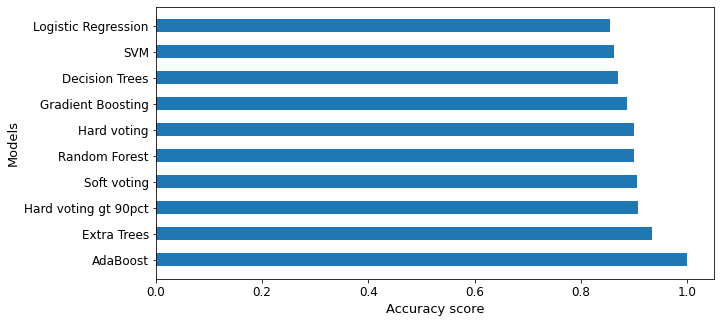

In [116]:
plt.figure(figsize=(10, 5))
plt.barh(np.arange(len(accuracy_score_df['Models'])),
         accuracy_score_df['Accuracy score'],
         align='center',
         height=0.5)

plt.yticks(np.arange(len(accuracy_score_df['Models'])), accuracy_score_df['Models'])
plt.tick_params(labelsize=12)
plt.xlabel('Accuracy score', fontdict={'fontsize': 13})
plt.ylabel('Models', fontdict={'fontsize': 13})

plt.show()

In [112]:
best_score_df = pd.DataFrame({'Models': ['SVM',
                                         'Decision Trees',
                                         'Random Forest',
                                         'AdaBoost',
                                         'Extra Trees',
                                         'Gradient Boosting'],
                              'best_score_': [svr_gridsearch.best_score_,
                                              decisionTree_gridsearch.best_score_,
                                              rdmFrst_gridsearch.best_score_,
                                              ada_gridsearch.best_score_,
                                              extraTree_gridsearch.best_score_,
                                              gbrt_gridsearch.best_score_]},
                             columns=['Models', 'best_score_'])
best_score_df.sort_values('best_score_', inplace=True, ascending=False)
best_score_df.reset_index(inplace=True, drop=True)

In [113]:
best_score_df

,Models,best_score_
0,Gradient Boosting,0.869231
1,Random Forest,0.862092
2,SVM,0.854154
3,Extra Trees,0.847692
4,Decision Trees,0.834246
5,AdaBoost,0.815108


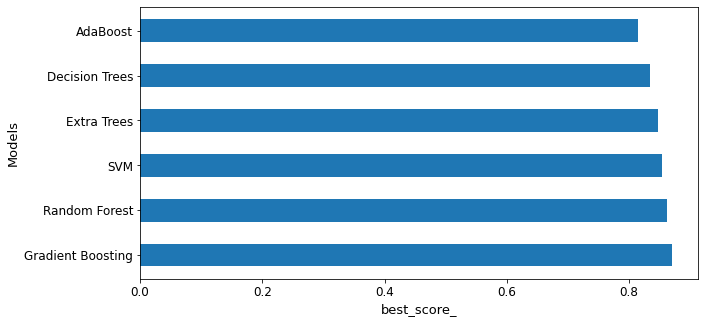

In [117]:
plt.figure(figsize=(10, 5))
plt.barh(np.arange(len(best_score_df['Models'])), best_score_df['best_score_'], align='center', height=0.5)

plt.yticks(np.arange(len(best_score_df['Models'])), best_score_df['Models'])
plt.tick_params(labelsize=12)
plt.xlabel('best_score_', fontdict={'fontsize': 13})
plt.ylabel('Models', fontdict={'fontsize': 13})

plt.show()

In [ ]:
y_test = voting_soft_clf.predict(X_test)

In [ ]:
passengerID_test = test_df['PassengerId']
output_df = pd.DataFrame({'PassengerId':passengerID_test,
                          'Survived': y_test},
                         columns=['PassengerId', 'Survived'])

In [ ]:
output_df.head()

In [ ]:
len(output_df)

In [ ]:
output_df.to_csv('titanic_predict_survivals.csv', index=False)